In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [35]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [37]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [38]:
df.cov()

/tmp/ipykernel_57987/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [39]:
df.corr()

/tmp/ipykernel_57987/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Dealing with Missing Values

In [40]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

In [42]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [43]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [44]:
# converting sex column to integer values
from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()
df['sex'] = labenc.fit_transform(df['sex'])
df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

## Visualizing Dataset

In [45]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<Axes: >

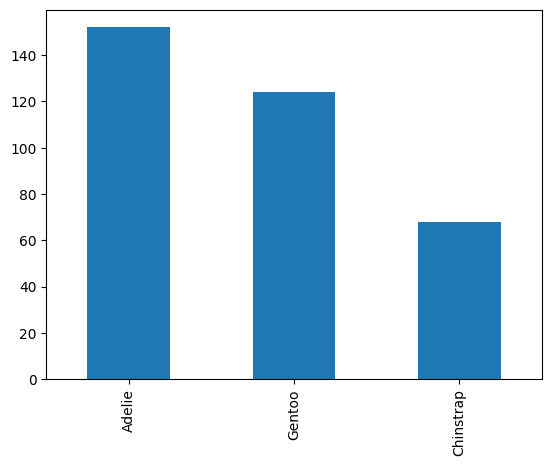

In [54]:
df['species'].value_counts().plot.bar()

<Axes: >

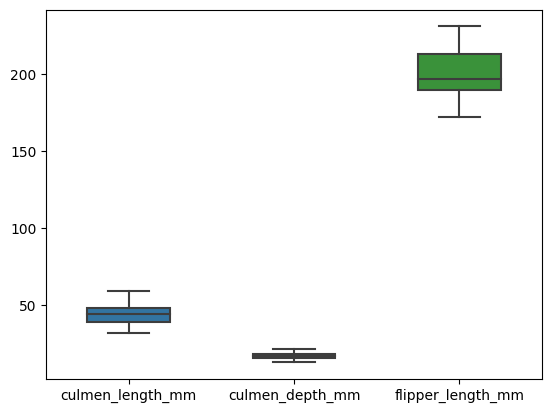

In [56]:
import seaborn as sns

df1 = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]

sns.boxplot(data=df1, width=0.5, fliersize=5)

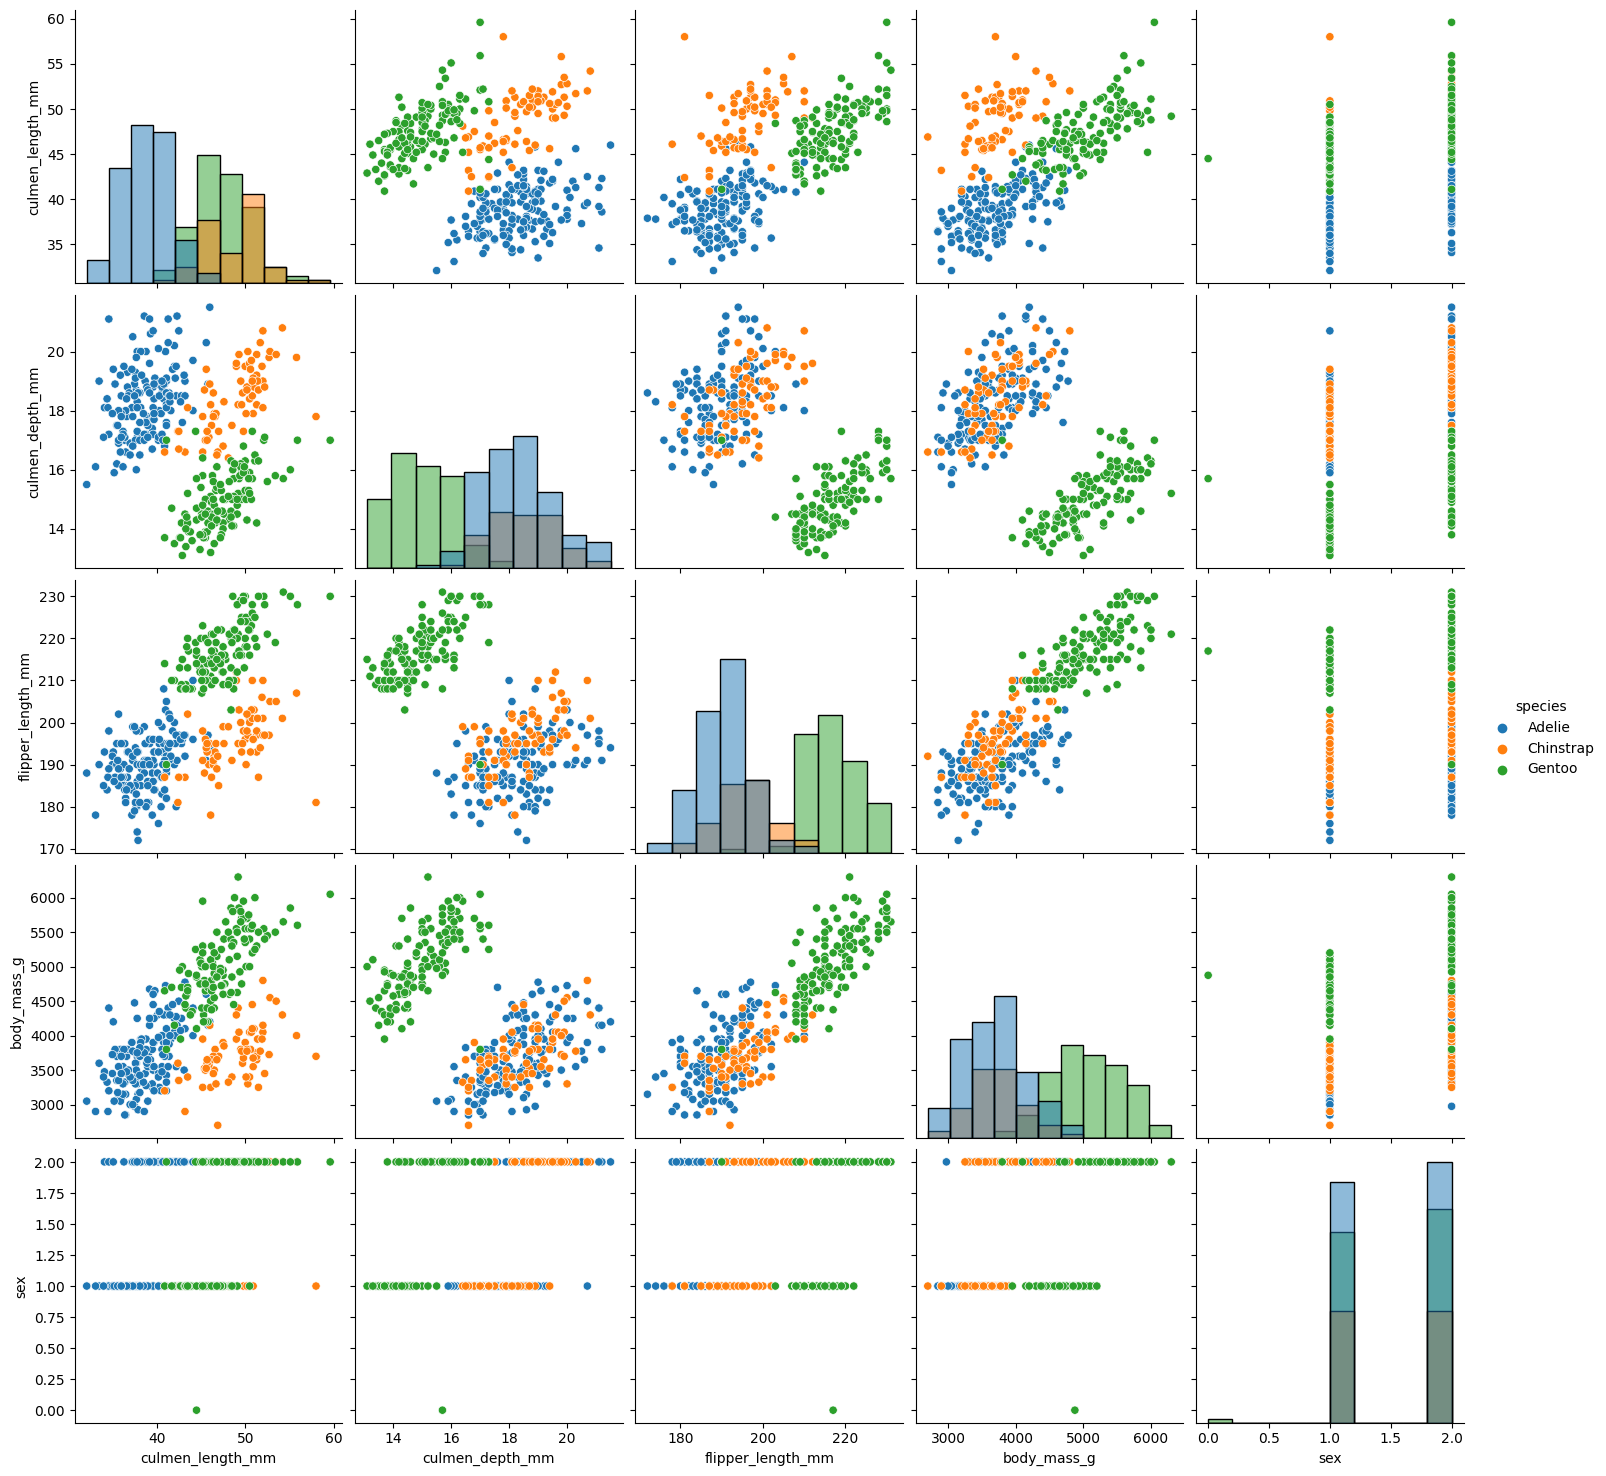

In [58]:
sns.pairplot(df, hue='species', height=3, diag_kind='hist')

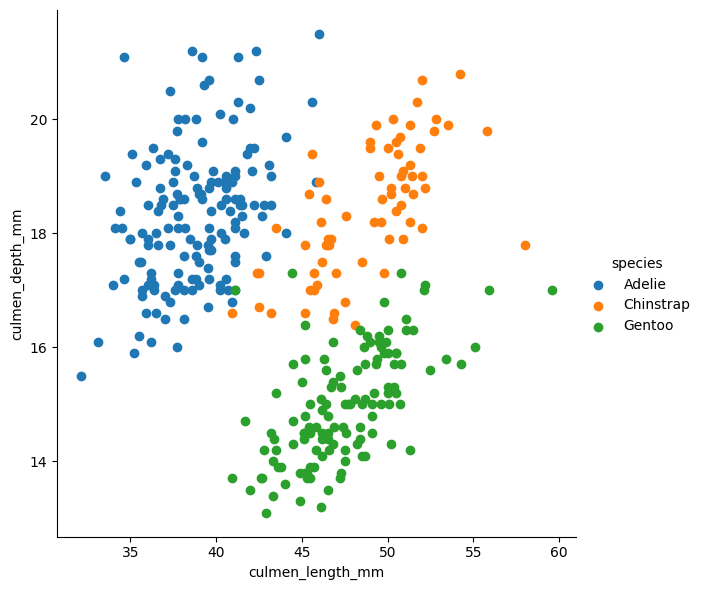

In [59]:
sns.FacetGrid(df, hue='species', height=6).map(plt.scatter, 'culmen_length_mm', 'culmen_depth_mm') \
.add_legend()

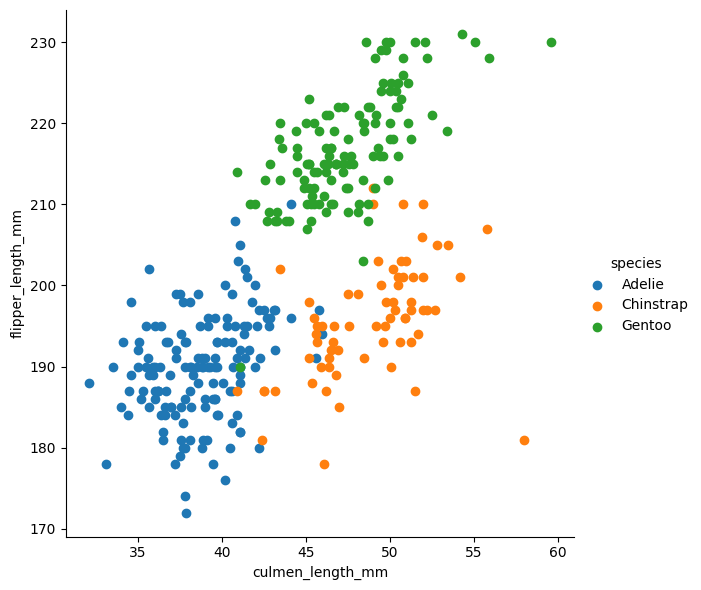

In [60]:
sns.FacetGrid(df, hue='species', height=6).map(plt.scatter, 'culmen_length_mm', 'flipper_length_mm') \
.add_legend()

<Axes: xlabel='species', ylabel='flipper_length_mm'>

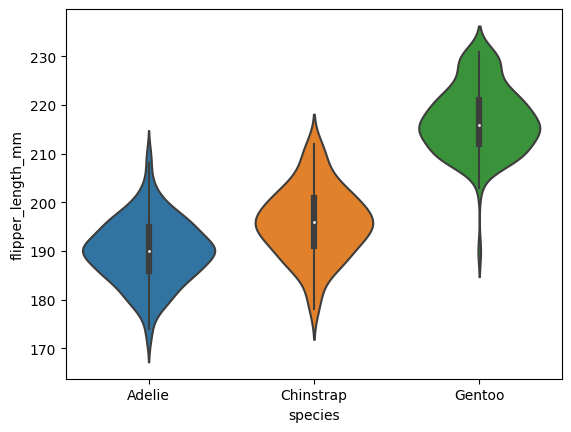

In [62]:
sns.violinplot(x='species', y='flipper_length_mm', data=df, size=8)

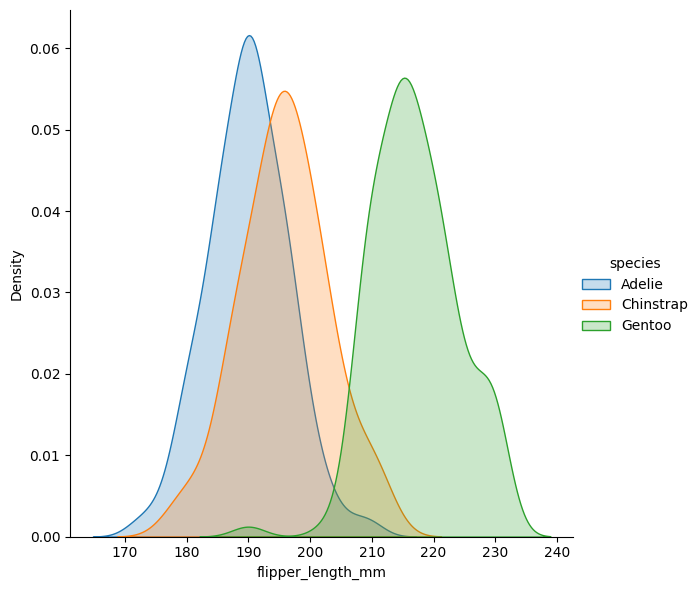

In [64]:
sns.FacetGrid(df, hue='species', height=6) \
.map(sns.kdeplot, 'flipper_length_mm', fill=True) \
.add_legend()

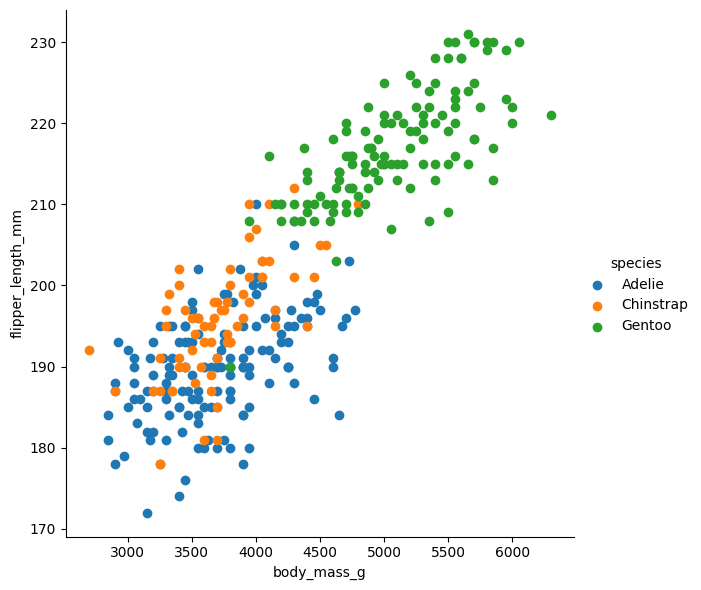

In [65]:
sns.FacetGrid(df, hue='species', height=6) \
.map(plt.scatter, 'body_mass_g', 'flipper_length_mm') \
.add_legend()